In [60]:
import nltk
import numpy as np
import pandas as pd
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.metrics import jaccard_distance
from nltk.stem import PorterStemmer, WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [61]:
df = pd.read_csv("Islamic Data.csv")

df.head(10)

,Topic,Scientific information,Quranic verse
0,The Big Bang Theory in Quran,The theory of the origin of the universe is on...,"""the heavens and the earth were joined togethe..."
1,The Big Crunch Theory in Quran,The Big Crunch theory that predicts how the un...,emember the day when we shall roll up the heav...
2,Oceanic Division mentions,The meeting of two oceans is termed conflux. W...,"“he released the two seas, meeting [side by si..."
3,Embryology in Quran,Embryology is a branch of biology concerned wi...,“We created man from an extract of clay. Then ...
4,Iron Within Meteorites,"According to M.E. Walrath, iron is not an elem...",“we sent down iron with its great inherent str...
5,Formation Of Clouds,"Unlike today, when children in elementary scho...",“Have you not seen how Allah makes the clouds ...
6,Pain Receptors in Quran,"For a long time, it was believed that the sens...",“We shall send those who reject our revelation...
7,Internal Waves In The Ocean,Oceanographers while studying water bodies dis...,"“it is covered by waves, above which are waves..."
8,The Frontal Lobe,"In the Quran, there is a story of a man named ...","“No indeed! if he does not stop, we will seize..."
9,Sun’s orbit,The belief that the Sun is stationary was wide...,"“It is He who created night and day, the sun a..."


In [62]:
df.shape

(24, 3)

In [63]:
print(df.columns)

Index(['Topic', 'Scientific information', 'Quranic verse'], dtype='object')


In [64]:
# Convert text to lowercase and remove special characters

df['Scientific information'] = df['Scientific information'].str.lower()
df['Scientific information'] = df['Scientific information'].str.replace('[^\w\s]', '')
df['Scientific information'] = df['Scientific information'].str.replace(r'\bquran\b', '', regex=True)

df['Quranic verse'] = df['Quranic verse'].str.lower()
df['Quranic verse'] = df['Quranic verse'].str.replace('[^\w\s]', '')

df.drop_duplicates(inplace=True)

C:\Users\momin\AppData\Local\Temp\ipykernel_25324\3144922527.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Scientific information'] = df['Scientific information'].str.replace('[^\w\s]', '')
C:\Users\momin\AppData\Local\Temp\ipykernel_25324\3144922527.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Quranic verse'] = df['Quranic verse'].str.replace('[^\w\s]', '')


In [65]:
df.to_csv("Cleaned Islamic Data.csv")

In [66]:
df = pd.read_csv("Cleaned Islamic Data.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Topic,Scientific information,Quranic verse
0,The Big Bang Theory in Quran,the theory of the origin of the universe is on...,the heavens and the earth were joined together...
1,The Big Crunch Theory in Quran,the big crunch theory that predicts how the un...,emember the day when we shall roll up the heav...
2,Oceanic Division mentions,the meeting of two oceans is termed conflux wh...,he released the two seas meeting side by side ...
3,Embryology in Quran,embryology is a branch of biology concerned wi...,we created man from an extract of clay then we...
4,Iron Within Meteorites,according to me walrath iron is not an element...,we sent down iron with its great inherent stre...


# EDA

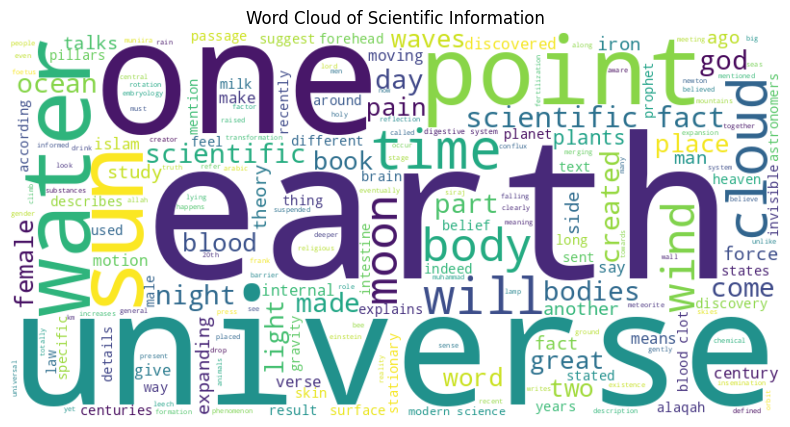

In [67]:
scientific_info_text = ' '.join(df['Scientific information'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(scientific_info_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Scientific Information')
plt.show()

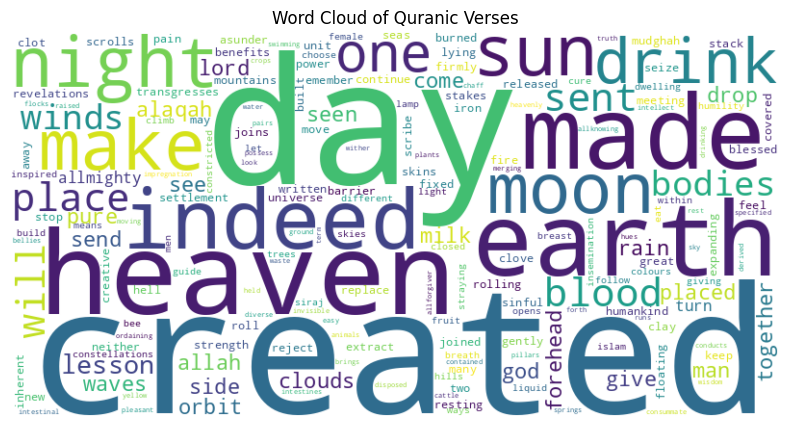

In [68]:
quranic_verse_text = ' '.join(df['Quranic verse'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(quranic_verse_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Quranic Verses')
plt.show()

# Text Preprocessing

In [69]:
# Downloading NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Tokenization
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Stop word removal
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# Stemming
def stem_tokens(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

# Lemmatization
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

# text preprocessing for 'Scientific information' column
df['Scientific information tokens'] = df['Scientific information'].apply(tokenize_text)
df['Scientific information tokens'] = df['Scientific information tokens'].apply(remove_stopwords)
df['Scientific information tokens stemmed'] = df['Scientific information tokens'].apply(stem_tokens)
df['Scientific information tokens lemmatized'] = df['Scientific information tokens'].apply(lemmatize_tokens)

# text preprocessing for 'Quranic verse' column
df['Quranic verse tokens'] = df['Quranic verse'].apply(tokenize_text)
df['Quranic verse tokens'] = df['Quranic verse tokens'].apply(remove_stopwords)
df['Quranic verse tokens stemmed'] = df['Quranic verse tokens'].apply(stem_tokens)
df['Quranic verse tokens lemmatized'] = df['Quranic verse tokens'].apply(lemmatize_tokens)

# Display the processed DataFrame
print(df[['Scientific information', 'Scientific information tokens lemmatized',
          'Quranic verse', 'Quranic verse tokens lemmatized']])


                               Scientific information  \
0   the theory of the origin of the universe is on...   
1   the big crunch theory that predicts how the un...   
2   the meeting of two oceans is termed conflux wh...   
3   embryology is a branch of biology concerned wi...   
4   according to me walrath iron is not an element...   
5   unlike today when children in elementary schoo...   
6   for a long time it was believed that the sense...   
7   oceanographers while studying water bodies dis...   
8   in the  there is a story of a man named abu ja...   
9   the belief that the sun is stationary was wide...   
10  a book titled earth by geophysicist frank pres...   
11  the fact that the universe is expanding was di...   
12  it is known that the sun is a star that genera...   
13  it is infact a highly common place reflection ...   
14  your lord inspired the female bee choose your ...   
15  the  also mentions the role and operation of a...   
16  it is only recently that re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\momin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\momin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\momin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


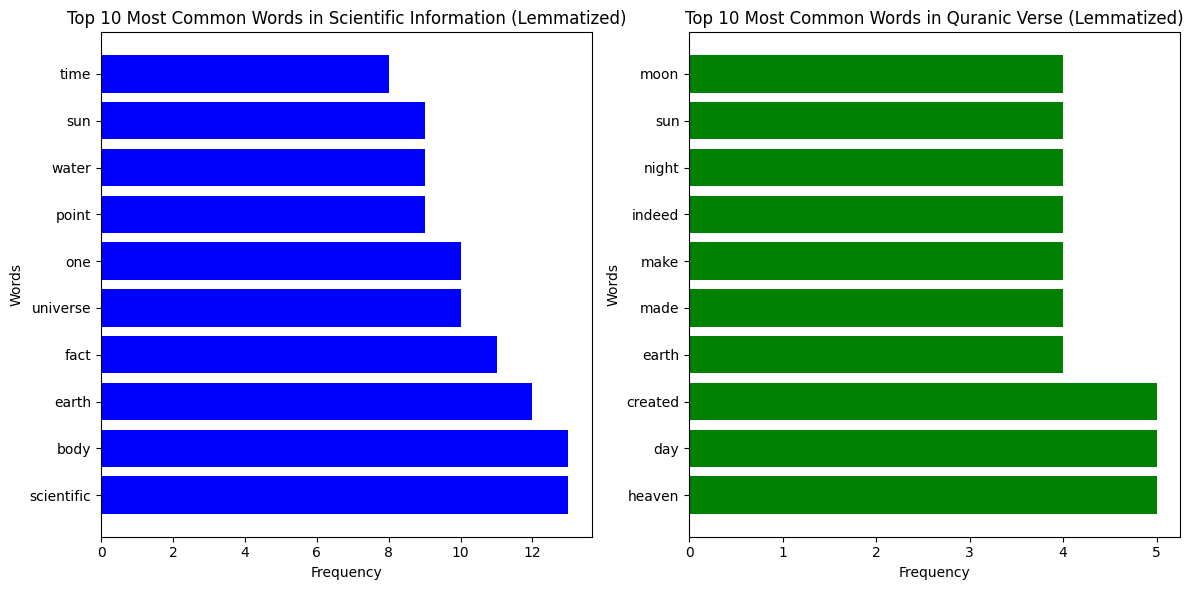

In [70]:
scientific_tokens = [word.lower() for tokens in df['Scientific information tokens lemmatized'] for word in tokens]
quranic_tokens = [word.lower() for tokens in df['Quranic verse tokens lemmatized'] for word in tokens]

# Calculate the frequency distribution of words in the 'Scientific information' & 'Quranic verse' columns
scientific_freq_dist = FreqDist(scientific_tokens)
quranic_freq_dist = FreqDist(quranic_tokens)

# Get the most common words 
top_n_scientific_words = scientific_freq_dist.most_common(10)
top_n_quranic_words = quranic_freq_dist.most_common(10)

# Extract words and frequencies for plotting
scientific_words, scientific_frequencies = zip(*top_n_scientific_words)
quranic_words, quranic_frequencies = zip(*top_n_quranic_words)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(scientific_words, scientific_frequencies, color='blue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Common Words in Scientific Information (Lemmatized)')

plt.subplot(1, 2, 2)
plt.barh(quranic_words, quranic_frequencies, color='green')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Common Words in Quranic Verse (Lemmatized)')

plt.tight_layout()
plt.show()


# Correlation Analysis

In [71]:
# Calculate Jaccard Similarity between the lemmatized text sets
jaccard_similarities = []
for index, row in df.iterrows():
    scientific_tokens = set(row['Scientific information tokens lemmatized'])
    quranic_tokens = set(row['Quranic verse tokens lemmatized'])
    jaccard_sim = 1 - jaccard_distance(scientific_tokens, quranic_tokens)
    jaccard_similarities.append(jaccard_sim)

# Add the Jaccard Similarity scores column to the DataFrame
df['Jaccard Similarity'] = jaccard_similarities

# Sentiment analysis using VADER
analyzer = SentimentIntensityAnalyzer()
df['Scientific Information Sentiment'] = df['Scientific information'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['Quranic Verse Sentiment'] = df['Quranic verse'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

print(df[['Topic', 'Jaccard Similarity', 'Scientific Information Sentiment', 'Quranic Verse Sentiment']])


                                       Topic  Jaccard Similarity  \
0               The Big Bang Theory in Quran            0.021739   
1             The Big Crunch Theory in Quran            0.000000   
2                  Oceanic Division mentions            0.205128   
3                        Embryology in Quran            0.212121   
4                     Iron Within Meteorites            0.258065   
5                        Formation Of Clouds            0.179104   
6                    Pain Receptors in Quran            0.400000   
7                Internal Waves In The Ocean            0.066667   
8                           The Frontal Lobe            0.130435   
9                                Sun’s orbit            0.280000   
10                                 Mountains            0.171429   
11                        Universe expanding            0.240000   
12  Light in the Moon is merely a Reflection            0.312500   
13                             High Altitude    

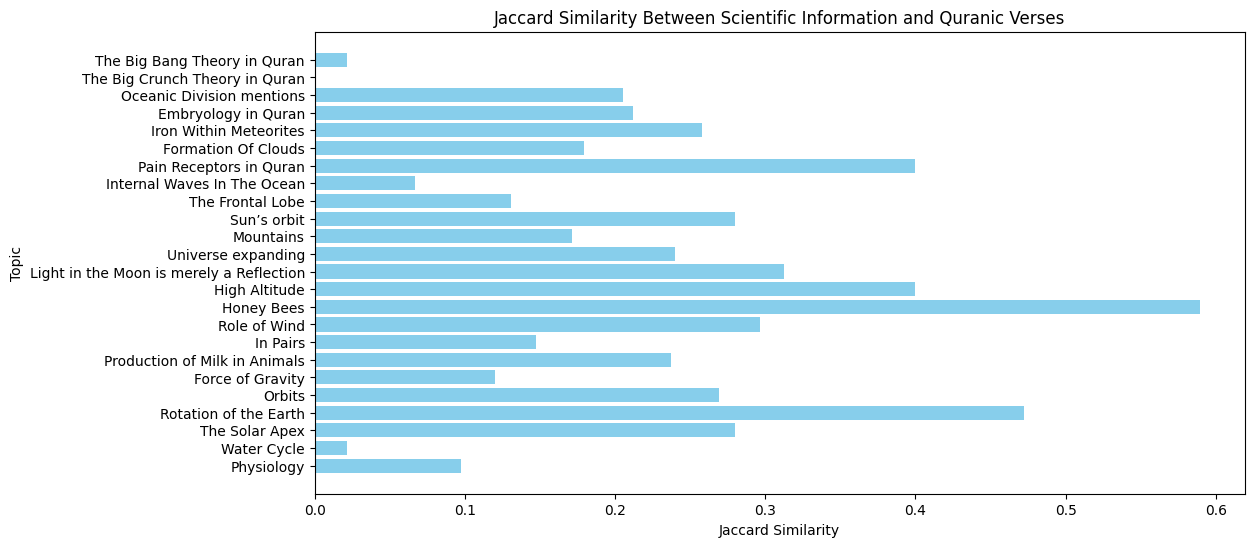

In [72]:
plt.figure(figsize=(12, 6))
plt.barh(df['Topic'], df['Jaccard Similarity'], color='skyblue')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Topic')
plt.title('Jaccard Similarity Between Scientific Information and Quranic Verses')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest similarity at the top
plt.show()


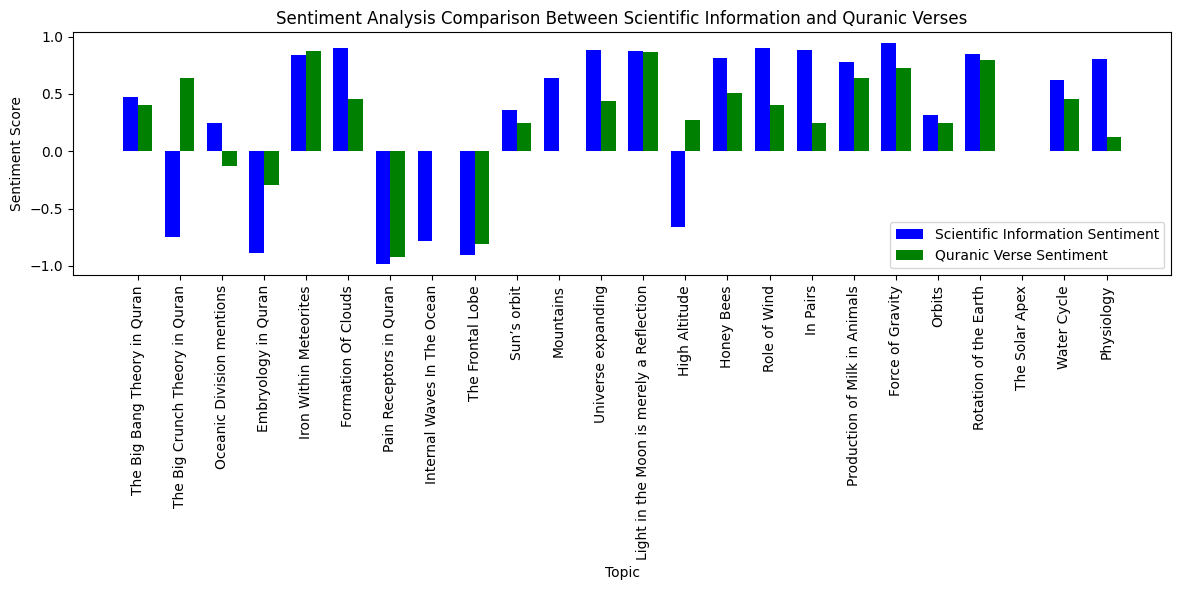

In [73]:
# Data for grouped bar chart
topics = df['Topic']
sci_sentiment = df['Scientific Information Sentiment']
quranic_sentiment = df['Quranic Verse Sentiment']
x = np.arange(len(topics))

# Create a grouped bar chart for sentiment analysis
width = 0.35
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/2, sci_sentiment, width, label='Scientific Information Sentiment', color='blue')
bar2 = ax.bar(x + width/2, quranic_sentiment, width, label='Quranic Verse Sentiment', color='green')

ax.set_xlabel('Topic')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Analysis Comparison Between Scientific Information and Quranic Verses')
ax.set_xticks(x)
ax.set_xticklabels(topics, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


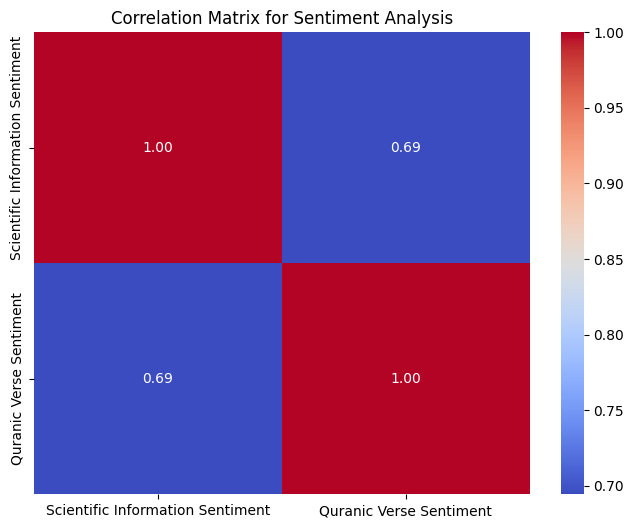

In [74]:
sentiment_columns = ['Scientific Information Sentiment', 'Quranic Verse Sentiment']

correlation_matrix = df[sentiment_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Sentiment Analysis')
plt.show()

#### In summary, our data analysis has unveiled valuable insights in the form of numeric findings. The Jaccard similarity analysis revealed varying degrees of text overlap between scientific facts and Quranic verses, ranging from 0.00 to 0.59. Sentiment analysis quantified sentiments expressed in the text, with scientific information showing sentiment scores ranging from -0.99 to 0.90, and Quranic verses ranging from -0.92 to 0.87.

#### The sentiment correlation matrix indicates a positive correlation of approximately 0.69 between the sentiment expressed in scientific information and Quranic verses. This suggests a consistent emotional tone or context between the two sources, further emphasizing the potential alignment and harmony between science and Islam in the dataset.

#### These numeric results suggest both textual relationships and emotional contexts within the dataset. Overall, our analysis sheds light on potential alignments between science and Islam, offering a numerical perspective on this fascinating intersection.